# Covid-19 infección en Ecuador. Modelos probabilisticos
Implementacion de un modelo probabilistico de infección por el virus Covid-19

Se realiza un análisis probabilistico simple del crecimiento de la infección en Python y el modelos para comprender mejor la evolución de la infección.

Se crea modelos de series temporales del número total de personas infectadas hasta la fecha (es decir, las personas realmente infectadas más las personas que han sido infectadas). Estos modelos tienen parámetros , que se estimarán por ajuste de probabilidad.

In [66]:
# Importar las librerias para el analasis
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
from scipy.optimize import curve_fit
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from scipy.integrate import odeint
from random import randrange 
import pygame

In [67]:
# Actualizar los datos (URL)
url = 'https://covid.ourworldindata.org/data/ecdc/new_cases.csv'
df = pd.read_csv(url)

df

,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,2019-12-31,27,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,2020-01-03,17,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,2020-01-04,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,2020-11-13,646281,360.0,410.0,851.0,49.0,137.0,0.0,0.0,11162.0,...,220.0,0.0,0.0,695.0,1.0,0.0,0.0,0.0,0.0,29.0
319,2020-11-14,628760,66.0,490.0,867.0,109.0,104.0,0.0,2.0,11859.0,...,63.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,57.0,69.0
320,2020-11-15,590843,205.0,532.0,844.0,0.0,171.0,0.0,1.0,8468.0,...,0.0,0.0,0.0,301.0,9.0,0.0,0.0,0.0,4.0,21.0
321,2020-11-16,500555,163.0,597.0,860.0,147.0,146.0,0.0,0.0,5645.0,...,563.0,0.0,0.0,911.0,16.0,0.0,0.0,0.0,26.0,0.0


Imprimos los resultados y agregamos el numero del dia


In [68]:
df = df.loc[:,['date','Ecuador']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df

,date,Ecuador
0,-1,0.0
1,0,0.0
2,1,0.0
3,2,0.0
4,3,0.0
...,...,...
318,317,883.0
319,318,1161.0
320,319,953.0
321,320,668.0


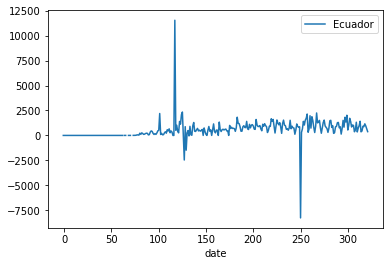

In [69]:
df.plot(x ='date', y='Ecuador')

Ahora podemos analizar un modelo probabilisto para el examen.

## El modelo basado en probabilidad

Para realizar un estimacion del factor de crecimiento de los casos de Covid 19 en Ecuador calculamos la mediana, con esto obtenemo el valor medio de crecimiento de un conjunto de datos, con esto podemos obtener un factor de crecimiento o taza de crecimiento de los nuevos casos.



In [70]:
filtro = df["Ecuador"][61:] # Filtro los datos que se empezo a tener casos
#Obtenemos la mediana
media = filtro.mean()
mediana = filtro.median()
print(mediana)
print(media)


665.0
703.0194552529183


De la ecuación de la recta y = mX + b nuestra pendiente «m» es el coeficiente y el término independiente «b»


In [71]:
#Vamos a comprobar:
# según la media y la mediana podemos obtener la taza de crecieminto y predicir su comportamiento.
# Cargamos los datos de total de casos
url = 'https://covid.ourworldindata.org/data/ecdc/total_cases.csv'
df_t = pd.read_csv(url)
df_t = df_t.loc[:,['date','Ecuador']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = df_t['date']
df_t['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df_t=df_t.dropna()
dias = list(df_t['date'])
y = list(df_t.iloc [:, 1]) # Total casos
x = list(df_t.iloc [:, 0]) # Dias


#Realizamos un ejemplo de prediccion
prediccion_siguiente = int(y[-1] + mediana)
print(prediccion_siguiente)

181341


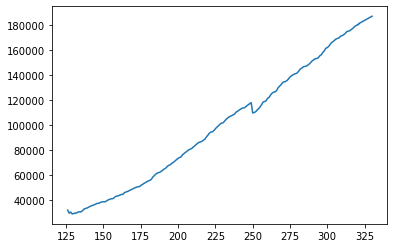

In [72]:
# Quiero predecir cuántos "Casos" voy a obtener de aqui a 10 dias.

for i in range(x[-1], x[-1]+10):
    x.append(i)
    y.append(int(y[-1] + mediana))
plt.plot(x[61:], y[61:])
plt.show()



# Practica

1. Comparar el modelo de predicion matematico vs probabilidad.
2. Generar el SIR en base al modelo de probabilidad y obtener beta y gamma con una semana de prediccion.
3. Retroceder un semana y comparar el modelo matematico vs probabilidad vs reales. Solo cargan los datos para generar los modelos menos 7 dias.

Puntos extras: Investigas sobre la correlacion de variables y aplicar el calculo en base a los datos del Ecuador.

# 1. Comparar el modelo de predicion matematico vs probabilidad.

In [78]:
def func(x, m0, m1, m2, m3):
    return m0 * np.exp(-m1 * x) + m2 + m3
g = [100, 0.01, 200, 0.01]
n = len(x[61:])
y = np.empty(n)
for i in range(n):
    y[i] = func(x[i], g[0], g[1], g[2], g[3])


<ipython-input-78-a972cba8769a>:2: RuntimeWarning:

overflow encountered in exp

<ipython-input-78-a972cba8769a>:2: RuntimeWarning:

overflow encountered in multiply



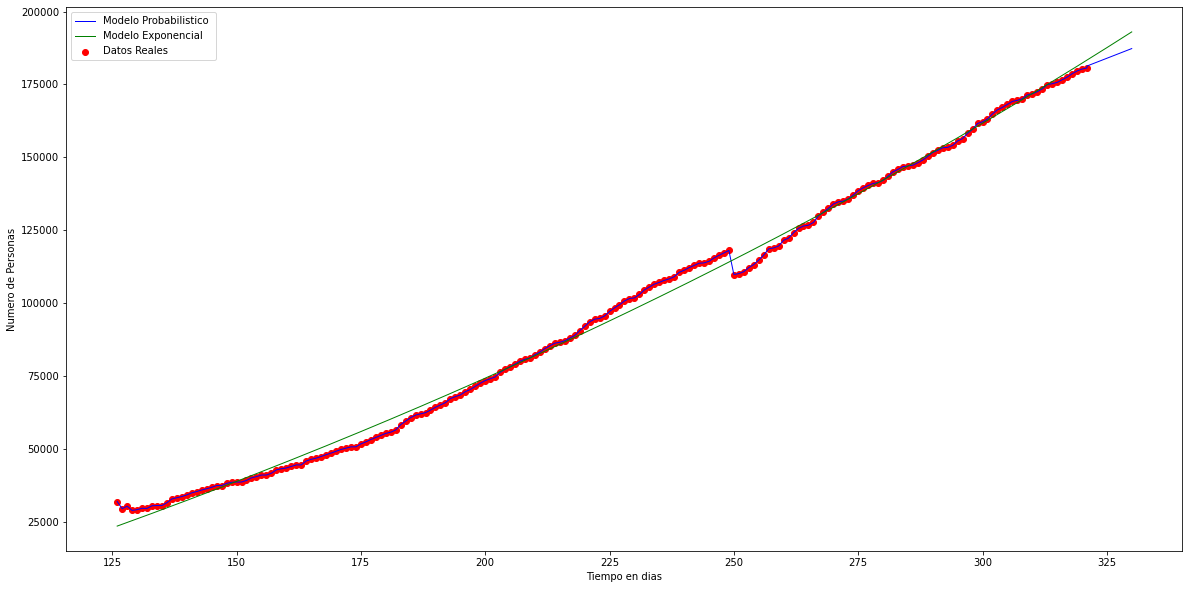

In [79]:
#MODELO PROBABILISTICO
y1 = list(df_t.iloc [:, 1]) # Total casos
x1 = list(df_t.iloc [:, 0]) # Dias
#Prediccion 10 dias
for i in range(x1[-1], x1[-1]+10):
    x1.append(i)
    y1.append(int(y1[-1] + mediana))

#MODELO EXPONENCIAL
yy = list(df_t.iloc [:, 1]) # Total casos
xx = list(df_t.iloc [:, 0]) # Dias
casos = list(df_t.iloc [:, 1])# Total casos
dias = list(df_t.iloc [:, 0]) # Dias

popt, pcov = curve_fit(func, dias[61:], casos[61:], g)
for i in range(n):
    casos[i] = func(dias[i], popt[0], popt[1], popt[2], popt[3])


#PREDECIR PARA 10DIAS
pred_x = np.array(list(range(min(dias[61:]),max(dias[61:])+10)))
#Grafica 1
fig = go.Figure()

fig.add_trace(go.Scatter(y=yy[61:],x=xx[61:],mode='markers',name='Datos Reales'))
fig.add_trace(go.Scatter(y=func(pred_x,*popt),x=pred_x,mode='lines',name='Modelo Exponencial'))
fig.add_trace(go.Scatter(y=y1[61:],x=x1[61:],mode='lines',name='Modelo Probabilistico'))

fig.show()
ka=t[0:len(y)]

#  Grafica2
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(x1[61:], y1[61:], 'b', alpha=1, lw=1, label='Modelo Probabilistico ')
ax.plot(pred_x, func(pred_x,*popt), 'g', alpha=1, lw=1, label='Modelo Exponencial')
ax.scatter(xx[61:], yy[61:],label="Datos Reales",color="red")
ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')

legend = ax.legend()

# 2. Generar el SIR en base al modelo de probabilidad y obtener beta y gamma con una semana de prediccion.

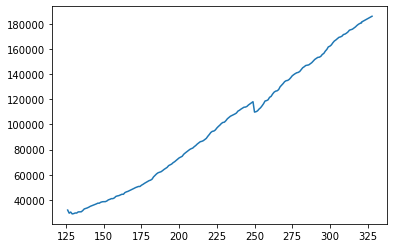

In [80]:
y0 = list(df_t.iloc [:, 1]) # Total casos
x0 = list(df_t.iloc [:, 0]) # Dias
#modelo de probabilidad 
#semana de prediccion.
for i in range(x0[-1], x0[-1]+8):
    x0.append(i)
    y0.append(int(y0[-1] + mediana))
plt.plot(x0[61:], y0[61:])
plt.show()
dias=x0[61:]
data=y0[61:]

Valor de Beta  0.039999998274153986
Valor de Gamma  1e-08
Valor de R0  3999999.8274153983


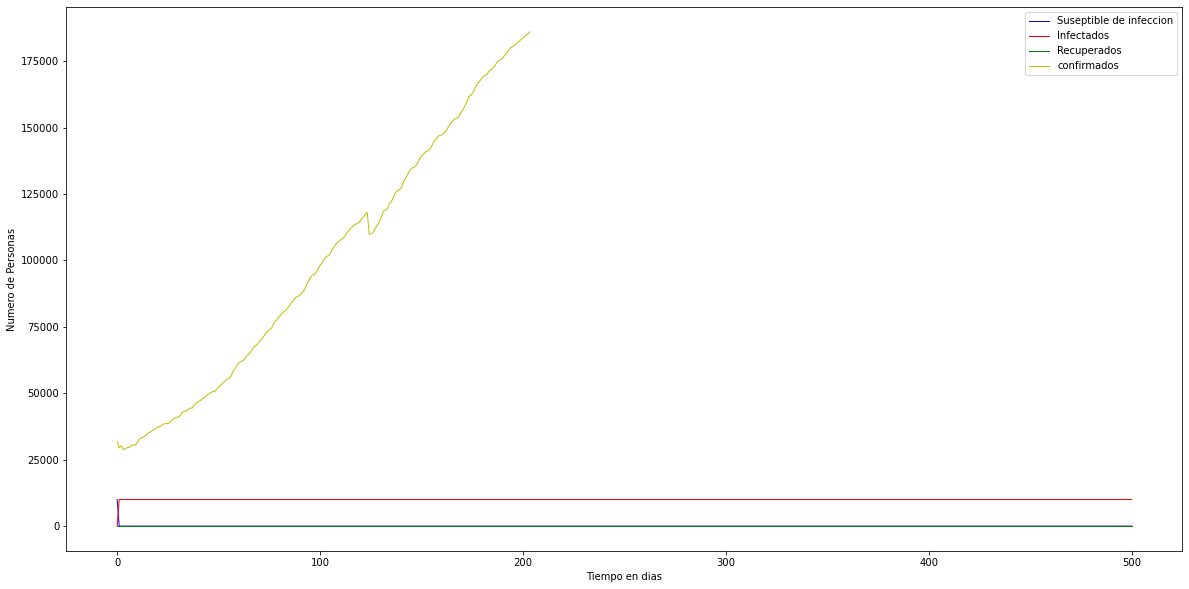

In [81]:
#Modelo SIR

# 3. Implementar teniendo en cuenta los casos confirmados y recuperados.
def loss(point, datos, s0, i0, r0):
    size = len(datos)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s0,i0,r0], t_eval=np.arange(0, size, 1), vectorized=True)
    return np.sqrt(np.mean((solution.y[1] - datos)**2))

#Numero habitantes del Ecuador
N=10000
#casos confirmados
i0=1
#Recuperados
r0=0
#Resto de la poblacion
s0= N - i0 - r0

x = dias
y = data
datos=data
optimal = minimize(loss, [0.001, 0.001], args=(datos,s0,i0, r0), method='L-BFGS-B', bounds=[(0.00000001,0.04), (0.00000001, 0.04)])   
beta, gamma = optimal.x
R00=(beta/gamma)

print('Valor de Beta ',beta)
print('Valor de Gamma ',gamma)
print('Valor de R0 ',R00) 

new_index =y
size = len(new_index)
ea = np.concatenate((y, [None] * (size - len(y))))
t = np.linspace(0, 500, 500)
# Las ecuaciones diferenciales del modelo SIR..
def deriv(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I 
    dIdt = beta * S * I  - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Vector de condiciones iniciales
y0 = s0,i0,r0

# Integre las ecuaciones SIR en la cuadrícula de tiempo, t. A traves de la funcion odeint()
ret = odeint(deriv, y0, t, args=(beta, gamma))
S, I, R = ret.T # Obtenicion de resultados
ka=t[0:len(y)]

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S, 'b', alpha=1, lw=1, label='Suseptible de infeccion')
ax.plot(t, I, 'r', alpha=1, lw=1, label='Infectados')
ax.plot(t, R, 'g', alpha=1, lw=1, label='Recuperados')
ax.plot(ka, ea, 'y', alpha=1, lw=1, label='confirmados')
ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')

legend = ax.legend()

# 3. Retroceder un semana y comparar el modelo matematico vs probabilidad vs reales. Solo cargan los datos para generar los modelos menos 7 dias.

Modelo Probabilistico 
Prediccion en 7 dias:  53394

Modelo Exponencial 
Prediccion en 7 dias:  307043

Datos Reales
En 7 dias:  180676.0


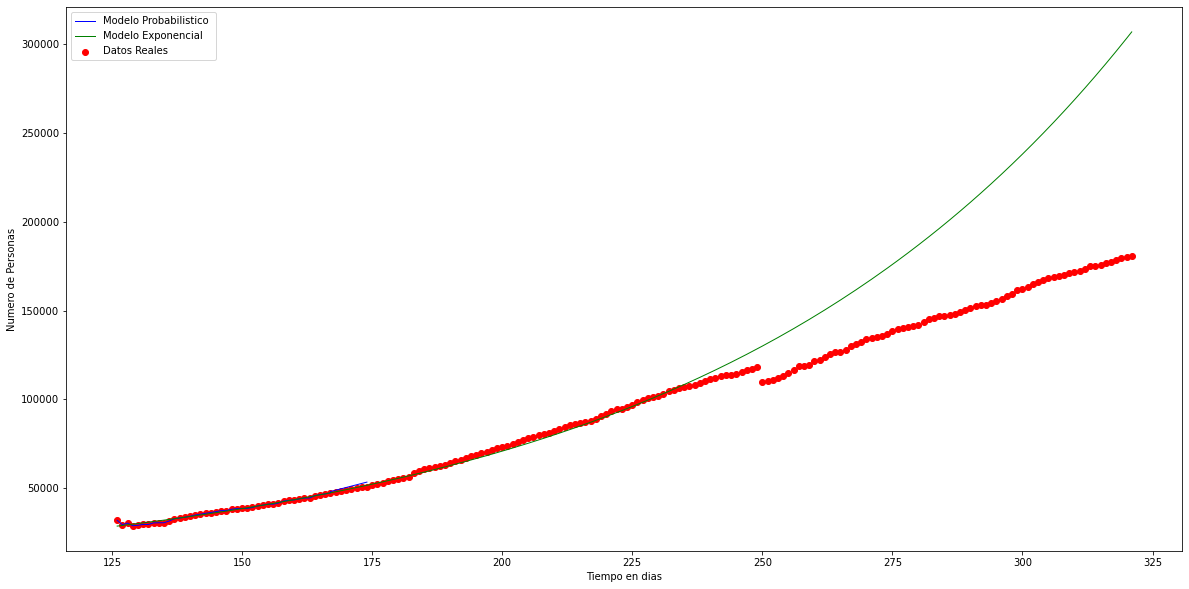

In [65]:
def func(x, m0, m1, m2, m3):
    return m0 * np.exp(-m1 * x) + m2 + m3
g = [100, 0.01, 200, 0.01]
n = len(x[61:])
y = np.empty(n)
for i in range(n):
    y[i] = func(x[i], g[0], g[1], g[2], g[3])

#MODELO DE PROBABILIDAD
y1 = list(df_t.iloc [:, 1][:103]) # Total casos
x1 = list(df_t.iloc [:, 0][:103]) # Dias
y_real = list(df_t.iloc [:, 1]) # Total casos
x_real = list(df_t.iloc [:, 0]) # Dias

#Prediccion 10 dias
for i in range(x1[-1], x1[-1]+8):
    x1.append(i)
    y1.append(int(y1[-1] + mediana))

#MODELO EXPONENCIAL
yy = list(df_t.iloc [:, 1][:103]) # Total casos
xx = list(df_t.iloc [:, 0][:103]) # Dias
casos = list(df_t.iloc [:, 1][:103])# Total casos
dias = list(df_t.iloc [:, 0][:103]) # Dias

popt, pcov = curve_fit(func, dias[61:], casos[61:], g)
for i in range(n):
    casos[i] = func(dias[i], popt[0], popt[1], popt[2], popt[3])


#Predecir para 10 dias
pred_x = np.array(x_real[61:])

print("Modelo Probabilistico ")
print("Prediccion en 7 dias: ",*y1[61:][-1:])
print("")
print("Modelo Exponencial ")
print("Prediccion en 7 dias: ",int(func(pred_x,*popt)[-1:]))
print("")
print("Datos Reales")
print("En 7 dias: ",*y_real[61:][-1:])
fig = go.Figure()

fig.add_trace(go.Scatter(y=y_real[61:],x=x_real[61:],mode='markers',name='Datos Reales'))
fig.add_trace(go.Scatter(y=func(pred_x,*popt),x=pred_x,mode='lines',name='Modelo Exponencial'))
fig.add_trace(go.Scatter(y=y1[61:],x=x1[61:],mode='lines',name='Modelo Probabilistico'))
fig.show()

#  Grafica
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111,  axisbelow=True)
ax.scatter(x_real[61:], y_real[61:],label="Datos Reales",color="red")
ax.plot(x1[61:], y1[61:], 'b', alpha=1, lw=1, label='Modelo Probabilistico ')
ax.plot(pred_x, func(pred_x,*popt), 'g', alpha=1, lw=1, label='Modelo Exponencial')

ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')
legend = ax.legend() 




## Analisis
En el calculo del modelo SIR se obtiene los siguientes valores:

1. Valor de Beta  0.039999998274153986
2. Valor de Gamma  1e-08
3. Valor de R0  3999999.8274153983

Se obtienen los siguientes datos despues de realizar la comparación con los modelos Probabilístico y el modelo matemático exponencial, en una predicción de 7 días:

1. Modelo Probabilistico 
Prediccion en 7 dias:  53394

2. Modelo Exponencial 
Prediccion en 7 dias:  307043

3. Datos Reales
Siete dias:  180676.0

Los dos modelos tienen una aproximación, la diferencia es que el probabilístico tiene una aproximación con tendencia baja es decir una aproximación menor al valor real, y el exponencial tiene una tendencia creciente, es decir es superi a los datos reales

## Conclusiones
Estas predicciones me indican la gravedad de los casos de contagios, indicando que puedo preventir cierto grado de contagios por lo cual concluyo de que ambos modelos tienen un gran grado de acierto en la predicción de los datos, y si se hiciera una valoración matemática en cuanto al ajuste ambos modelos tendrían resultados casi parecido solo que valores creciente( Modelo exponencial) y decreciente(Modelo probabilístico), por otra parte en la predicción al restar 7 días y realizar las predicciones vemos que los dos modelos casi se acercan a los datos correctos teniendo un grado de falla baja.




## Criterio personal (politico, economico y  social de la situacion)

En el siguiente analisis las prediciones pueden ser correctas o no ya que no se cuenta con informacion certera que ofreces los medios del gobierno, se podria decir que esta prediccion de casos de contagios que atraviesa el pais, la información de contagios y muertes puede estar alterada y dado esto no se puede realizar un modelo de predicción apegado a la realidad, dado  a la situación del país, segun medios del gobierno brinda esta informacion:

160.639 pacientes recuperados.
22.463 casos con alta hospitalaria.
8.681 personas fallecidas (confirmados COVID-19)
481 hospitalizados estables.
368 hospitalizados con pronóstico reservado.
368.917 casos fueron descartados
Fuente: https://www.salud.gob.ec/actualizacion-de-casos-de-coronavirus-en-ecuador/

Esto apunta a una mala organización y administración por parte del gobierno y la cultura propia del ecuatoriano no es de las mejores.



# Referencias

- https://www.researchgate.net/publication/340092755_Infeccion_del_Covid-19_en_Colombia_Una_comparacion_de_modelos_logisticos_y_exponenciales_aplicados_a_la_infeccion_por_el_virus_en_Colombia

- https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/